<a href="https://colab.research.google.com/github/manisha-dhanuka/EDA-Project/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   - Hotel Booking Analysis

**Project Type** - EDA


**Contribution** - Individual 

Github Link: 
https://github.com/manisha-dhanuka/EDA-Project

# Project Summary

The hotel industry is one of the most important components of the wider service industry, catering for customers who require overnight accommodation. It is closely associated with the travel industry and the hospitality industry. In this project, I explored data related to bookings of two hotels: Resort Hotel and City Hotel.

First exploration was to find out if there are any null or duplicates 
in the dataset. There were many, handled them by replacing it with 0 in case of number of children and ‘No intermediaries’ in case of agents and company assuming these to be self-booked. Also, go along with the null values of country since filling /imputing it with any random value won’t have been right choice and would have affect the data accuracy.  For the duplicates, I decided not to drop them as the features do not have any unique id indicating these are same or different observations, and by any chance if the duplicates were because of mass-bookings then dropping them would have affect the EDA.

Later, I did the Analysis and the main conclusions are:
1.	City hotel accounts for nearly 66% of the bookings.
2.	Bookings in mid-year is comparatively more in all the three years.
3.	Nearly 42% of City Hotel and 22% of Resort hotel bookings were cancelled.
4.	People from Portuguese visited the hotel most. But the cancellations are maximum from the too. The potential countries are Portugal, Great Britain, France, Spain and Germany.
5.	‘A’ type room is really in demand whereas the other rooms like L, K, P are rarely demanded maybe because of the price. Hotel officials can consider converting those less demanded (if number of unoccupied rooms are considerably high) into the more demanded one.
6.	Travel Agents and Tour Operators are actually contributing a lot to the hotel revenue but this creates a discretion of them. They could move to other hotels if they are given more benefits. So, to avoid any kind of human- discretion, focus should also be given towards Direct bookings and that can be done through media Advertisements. Leveraging Online TA would be a great benefit using market campaigns or discounts.
7.	Also, contribution of Global Distribution Systems to the ADR is maximum

# Problem Statement:



This hotel Booking dataset consists of booking information for City Hotel and Resort Hotel , and include informations such as when the booking was made, length of stay, number of adults, children and babies, and the number of available parking spaces, among other things. Explore and analyze the data to discover important factors that govern the bookings. 

# Business Objective:



Analyzing the data for taking data driven decision to increase bookings i.e. increasing customer rate.


# Mounting the Drive:

In [19]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the required libraries:

In [20]:
# Importing some of the packages required:
import numpy as np
import pandas as pd

# For Visualisation purposes:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
sns.set_theme()

# Reading the data as a pandas dataframe:

In [22]:
# Importing the dataframe
hotel_df = pd.read_csv("/content/drive/MyDrive/Hotel Booking Analysis - Manisha Dhanuka/Hotel Bookings.csv")

# First Look at the data :

In [23]:
# First Look at columns, data-types and nulls:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [24]:
# How the data looks like:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Seems a large Data set of 120 thousands records. Let's dive into further and learn what each column represent .

# Data Description:

## Data is about two hotels :
1. City Hotel
2. Resort Hotel 

## Columns Description: 

**1.** **IsCanceled** (Categorical	Value)- indicating if the booking was canceled (1) or not (0)

**2.** **LeadTime** (Integer)-	Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**3.** **ArrivalDateYear** (Integer)-	Year of arrival date

**4.** **ArrivalDateMonth**	(Categorical)-	Month of arrival date with 12 categories: “January” to “December”

**5. ArrivalDateWeekNumber**	(Integer)-	Week number of the arrival date

**6. ArrivalDateDayOfMonth** (Integer)-	Day of the month of the arrival date

**7. StaysInWeekendNights**	(Integer)	-Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel


**8. StaysInWeekNights**	(Integer)-	Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**9. Adults**	(Integer)-	Number of adults

**10. Children** (Integer)-	Number of children

**11. Babies** (Integer)-	Number of babies

**12. Meal**	(Categorical)-	Type of meal booked. Categories are presented in standard hospitality meal packages:

* Undefined/SC – no meal package;

* BB – Bed & Breakfast;

* HB – Half board (breakfast and one other meal – usually dinner);

* FB – Full board (breakfast, lunch and dinner)

**13. Country** (Categorical)-	Country of origin.

**14. MarketSegment	(Categorical)**-	Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”	
**15. DistributionChannel	(Categorical)**-	Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**16. IsRepeatedGuest**	(Categorical)-	Value indicating if the booking name was from a repeated guest (1) or not (0)

**17. PreviousCancellations**	(Integer)-	Number of previous bookings that were cancelled by the customer prior to the current booking

**18. PreviousBookingsNotCanceled**	(Integer)-	Number of previous bookings not cancelled by the customer prior to the current booking


**19. ReservedRoomType** (Categorical	)-Code of room type reserved. Code is presented instead of designation for anonymity reasons

**20. AssignedRoomType**	(Categorical)-	Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reason

**21. BookingChanges**	(Integer)-	Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**22. DepositType**	(Categorical)-Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
No Deposit – no deposit was made;
Non Refund – a deposit was made in the value of the total stay cost;
Refundable – a deposit was made with a value under the total cost of stay.

**23. Agent**	(Categorical)-	ID of the travel agency that made the booking

**24. Company**	(Categorical)-	ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**25. DaysInWaitingList**	(Integer)-	Number of days the booking was in the waiting list before it was confirmed to the customer

**26. CustomerType**(	Categorical)-	Type of booking, assuming one of four categories:

* Contract - when the booking has an allotment or other type of contract associated to it;

* Group – when the booking is associated to a group;

* Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;

* Transient-party – when the booking is transient, but is associated to at least other transient booking

**27. ADR	(Numeric)**-	Average Daily Rate:The average daily rate (ADR) measures the average rental revenue earned for an occupied room per day.

**28. RequiredCardParkingSpaces**	(Integer)-	Number of car parking spaces required by the customer

**29. TotalOfSpecialRequests**	(Integer)-	Number of special requests made by the customer (e.g. twin bed or high floor)

**30. ReservationStatus**	(Categorical)- Reservation last status, assuming one of three categories:	
* Canceled – booking was canceled by the customer;

* Check-Out – customer has checked in but already departed;

* No-Show – customer did not check-in and did inform the hotel of the reason why

**31. ReservationStatusDate**	(Date)-	Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel







# Descriptive Statistics summary of the numerical columns:

In [25]:
# Descriptive Statistics summary of the numerical columns:
hotel_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


# Correlation Heatmap:

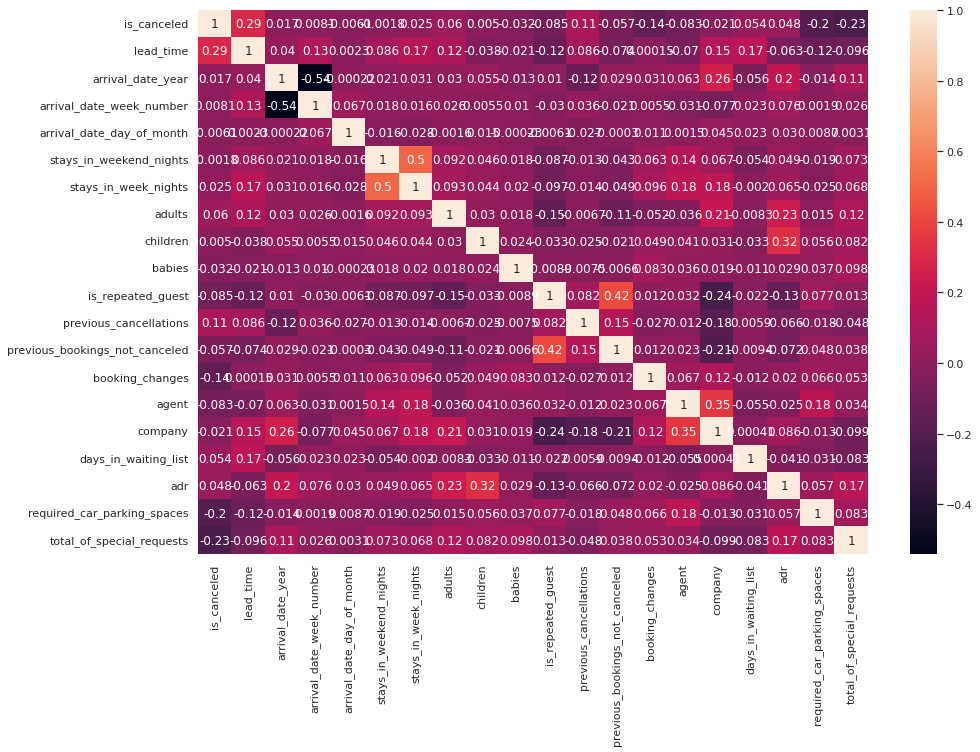

In [26]:
# correlation between the variables:
plt.figure(figsize= (15,10))
sns.heatmap(hotel_df.corr(),annot = True);

## **Correlation:** 
Correlation is a statistical measure that expresses the extent to which two variables are linearly related . Its value varies between -1 to 1.Negative value indicates movement in the opposite directions. Magnitude of the value indicates the relationship extent. 

## **Heatmap :**
 A kind of matrix plot. It is visual equivalent of a pivot table. 



##  Insights from the chart: 
Any of the feature is hardly related to other features. Thus, all the data are independent which is actually expected from such the given features. 

In [27]:
# For saving the plots:
from google.colab import files

# Data Cleaning: Checking For Null Values:


In [28]:
# Checking for null values as there are some as per info :

hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

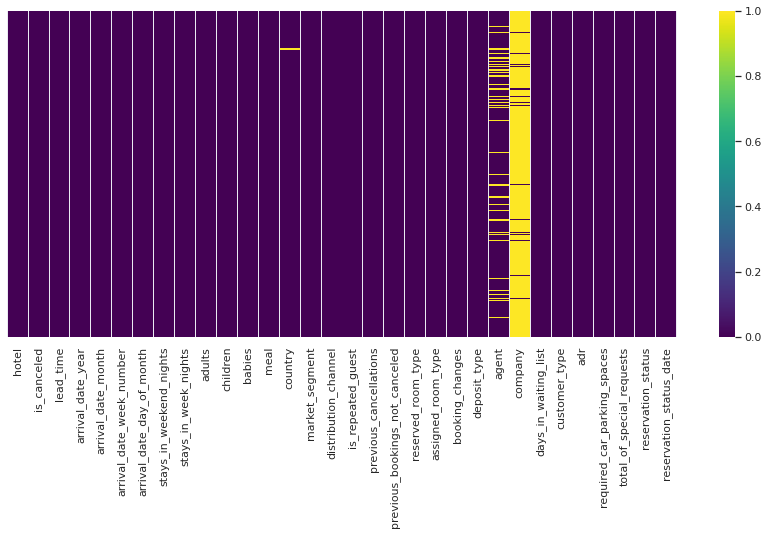

In [29]:
# Visualising the null values:
plt.figure(figsize = (15,6))
sns.heatmap(hotel_df.isnull(), data =hotel_df, yticklabels = False, cmap = 'viridis')
# plt.savefig("hotel_null.png")
# files.download("hotel_null.png");

In [30]:
# columns containing null values are:
null_columns = [col for col in hotel_df.columns if hotel_df[col].isnull().sum()]
print(null_columns)

['children', 'country', 'agent', 'company']


# Observation and decision/assumptions for null values:

1. Nan values in Children could be because of tourist having no children , so replacing it with 0
2. Null values in the agent or company column could be a sign of booking on its own ...we could use this in our analysis 
3. Also we cannot extrapolate the country thus, we are going to move with null values further:

In [31]:
# Handling the null values:

hotel_df['children'] = hotel_df['children'].fillna(0)
hotel_df['agent'] = hotel_df['agent'].fillna('No intermediaries')
hotel_df['company'] = hotel_df['company'].fillna('No intermediaries')

# Duplicate Observations:


In [32]:
# Checking for duplicates:

hotel_df.duplicated().sum()

31994

## Insights:
 There are many duplicates but since personal information is omitted and we don't have unique booking id ...we can't say if they are actually duplicate values or different instances by chance have same features  or there was mass booking which is clearly possible with available data and features. So, i decided not to drop the duplicates and go ahead with them.

#Univariate Analysis:

# Chart - 1: Analysing Bookings per Hotel:

In [33]:
hotel_df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [34]:
# Analysing bookings per hotel:
total = hotel_df.hotel.value_counts()

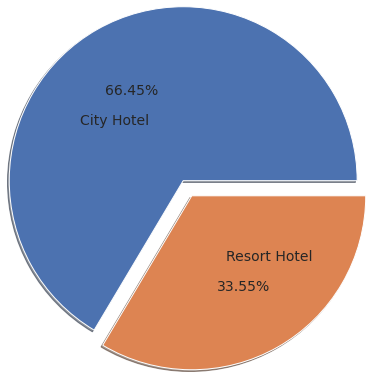

In [35]:
#percentage of total bookings:

pie = plt.pie(total,labels = total.index,radius = 2, autopct = "%1.2f%%",shadow = True,
              textprops = {'fontsize':14}, explode =[0.1,0.1],labeldistance = 0.4,center =(0.1,0.1))

# plt.savefig("Booking percentage.png")
# files.download("Booking percentage.png");

## Why Pie Chart?
Pie Chart displays the category distribution as the area of the circle.Each slice represents the count or percentage of the observations of a level for the variable. Pie charts can be helpful for showing the relationship of parts to the whole when there are a small number of levels.
 


## Insights:
Out of total 12000 booking data , 2/3rd booking are from City Hotel .i.e ratio is 2:1.
If the two hotels are competitors then Resort Hotel needs to do well to gain customers. Even if they are not competitors , Resort HOtel needs to work on its services . 

## Impact on Business:
If the services are worked upon then it can bring a positive impact for the hotel revenue. 


# Chart- 2: Booking Over the Years:

Text(0, 0.5, ' Number of Bookings')

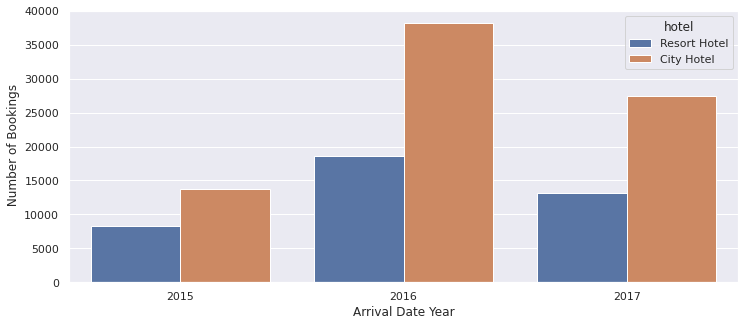

In [36]:
# Booking distribution per year per hotel:
plt.figure(figsize = (12,5))
sns.countplot(data = hotel_df , x= 'arrival_date_year', hue = 'hotel')
plt.xlabel("Arrival Date Year")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_year.png")
# files.download("Bookings_year.png");

## Why Countplot?
Countplot shows the count value of the categorical data. USed it to find the number of bookings in each hotel over the years. 


##  Insights: 
From the above data it seems that the bookings in 2016 are more as compare to other. But this needs further analysis to reachg to any conclusion.

# Chart -3: Cumulative Booking Trend Analysis over the months:

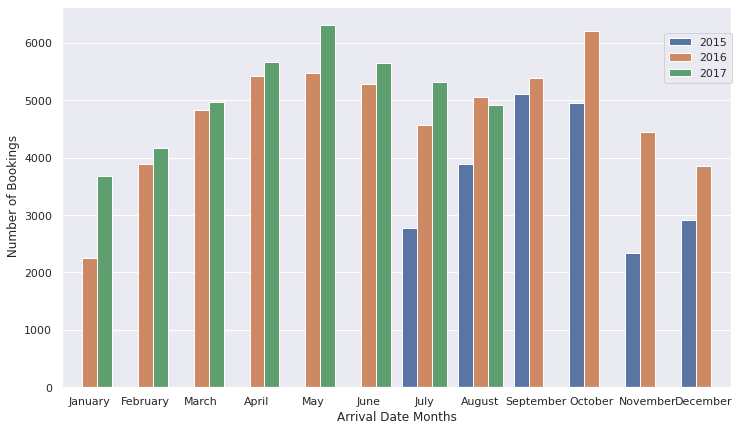

In [37]:
# Booking distribution per month per hotel:
plt.figure(figsize = (12,7))
sns.countplot(data = hotel_df , x= 'arrival_date_month', hue = 'arrival_date_year',
              order = ['January','February','March','April', 'May','June','July','August','September','October','November','December'])
plt.xlabel("Arrival Date Months")
plt.ylabel(" Number of Bookings")
plt.legend(loc =(.9,.8) )
# plt.savefig("Bookings_month.png")
# files.download("Bookings_month.png");

## Why Countplot?
Countplot shows the count value of the categorical data. Used year as hue feature to see the booking trends over the time.

## Insights:
There is a seasonal trend i.e. the number of bookings in mid-year is high as compare to the extreme months, but October has high bookings.  Also, It also clears the doubt regarding whether the number of booking has decreased after 2016. It clearly shows that the data is limited to July 2015 to August 2017 . Thus the time period is not same. We cannot calculate annual customer growth rate  from the given data .

## Impact on Business: 
Clearly, the demands in mid-year are already high. Hotels can use different tactics to attract tourists in off-seasons like discounts or other complimentary services.Thus will be a positive impact.

# Chart - 3: Do Both The hotels show same seasonal trends?

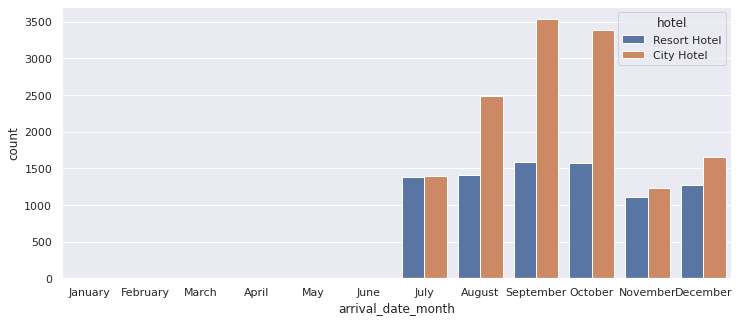

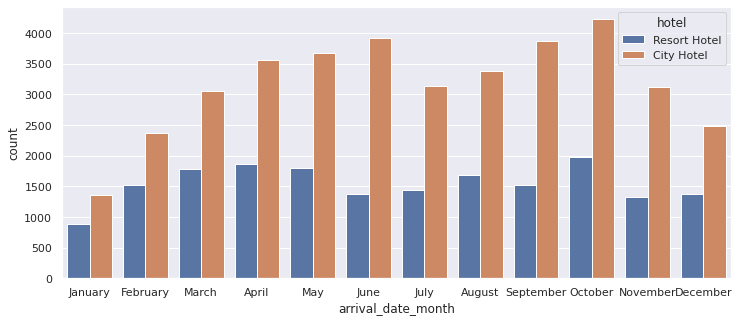

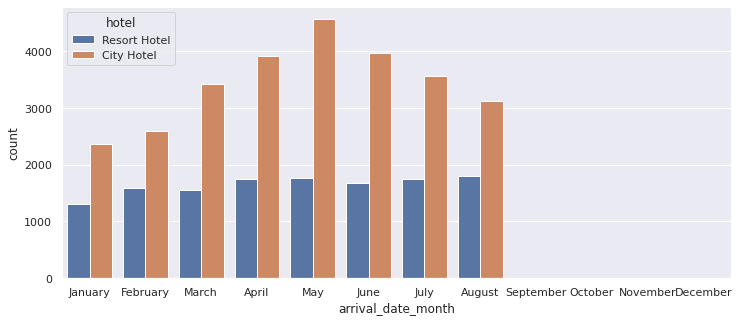

In [38]:
# Distribution with respect to month:
for year in [2015,2016,2017]:
  fig = plt.figure(figsize=(12,5))
  ax = plt.gca()
  
  sns.countplot(data = hotel_df[hotel_df['arrival_date_year']== year] , x= 'arrival_date_month', hue = 'hotel',
                order = ['January','February','March','April', 'May','June','July','August','September','October','November','December']);

Nearly Trend per year is similar..so, we can cumulatively call months wiith respect to years to see the overall trend

Text(0, 0.5, ' Number of Bookings')

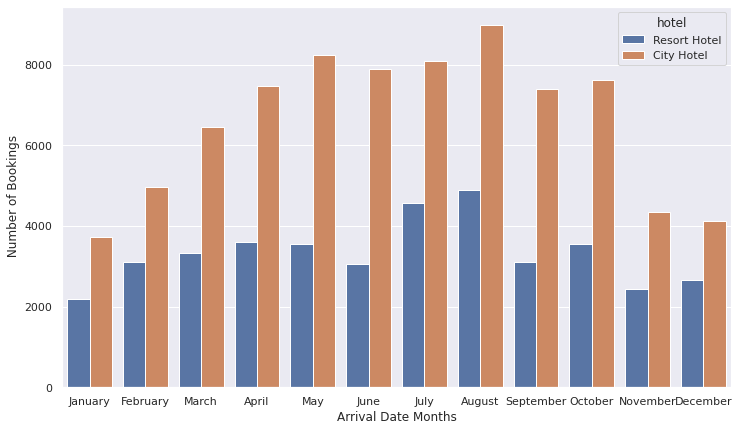

In [39]:
# Booking distribution per month per hotel:
plt.figure(figsize = (12,7))
sns.countplot(data = hotel_df , x= 'arrival_date_month', hue = 'hotel',
              order = ['January','February','March','April', 'May','June','July','August','September','October','November','December'])
plt.xlabel("Arrival Date Months")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_month.png")
# files.download("Bookings_month.png");

## Why Countplot?:
The count plots hepls us to understand if the seasonal trends are same for both the hotels or not. 
## Insight:
Both the hotels follow same seasonal trend.

## Impact: 
As such there is no competitive advantage for any of the hotel . 

# Chart - 4: Booking Cancellation Analysis: 

In [40]:
# Defining function to find effective booking with respect to various columns:
def table(column):
    proportion = hotel_df.groupby(column).agg({column : 'count','is_canceled' : 'sum'}).rename(columns = {column:"Number of bookings", 'is_canceled': "Number of cancellations"})
    proportion['Number of final bookings']= proportion['Number of bookings']- proportion['Number of cancellations']
    proportion['percentage of cancellations'] = (proportion['Number of cancellations'] *100)/proportion['Number of bookings']
    return proportion

Text(0, 0.5, ' Number of Bookings')

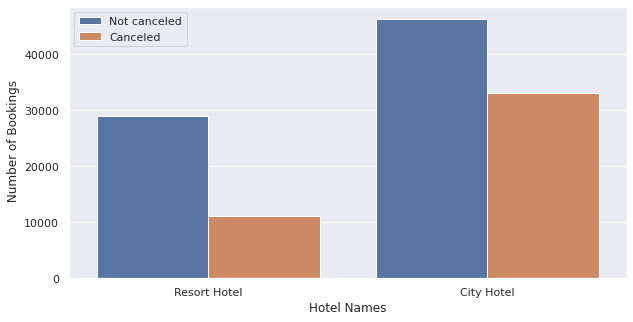

In [41]:
# Proportion of tourist cancellations in each hotel:
plt.figure(figsize = (10,5))
sns.countplot(data = hotel_df,hue = 'is_canceled', x = 'hotel')
plt.legend(loc = 'upper left',labels = ['Not canceled','Canceled'])
plt.xlabel("Hotel Names")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_cancelled.png")
# files.download("Bookings_cancelled.png");

In [42]:
# Cancellation Table:
table('hotel')

,Number of bookings,Number of cancellations,Number of final bookings,percentage of cancellations
hotel,,,,
City Hotel,79330,33102,46228,41.726963
Resort Hotel,40060,11122,28938,27.763355


## Insights: 
Although the number of bookings in Resort Hotel are less in comparison to the City Hotel But the cancellation rate is also less in it i.e. nearly 73% of bookings are retained by it whereas City Hotel lost 41% of it's bookings. 

## Impact: 
If not looked upon the reasons for the cancellations, then it can  have a negative impact over a long period of time. 

# Chart- 5: Top 15 Countries: 

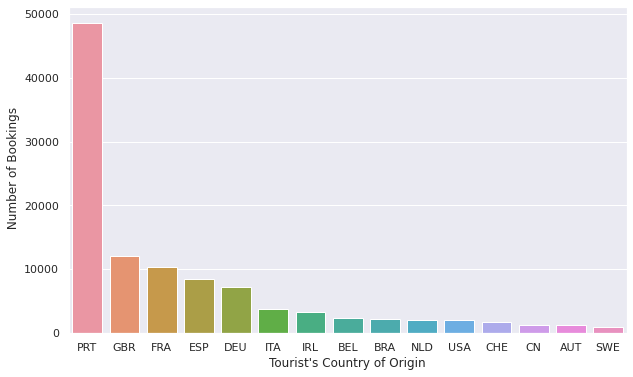

In [43]:
# Top 15 countries contributing to the bookings:

plt.figure(figsize = (10, 6))
sns.countplot(data = hotel_df, x= 'country', order = hotel_df['country'].value_counts().iloc[:15].index)

plt.xlabel("Tourist's Country of Origin")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_country.png")
# files.download("Bookings_country.png");

plt.show()

## Why This Chart?
The countplot display thge number of values each category. Here we limited the categories to top 15 to analyse the contries contributing more. 

##  Insights:
Clearly, Portugal has a bigger chunk of bookings followed by Great Britain, France & Spain. 

## Impact: 
As such the country of origin doesn't impact the hotel business, but if in case the assess to the hotels to the people of portugal is restricted for some reason, then it would definitely negatively imoact the business, So, the hotels need to reach to the customers in other countries too. 

# Chart- 6: Lead Time Analysis: 

Text(0, 0.5, ' Number of Bookings')

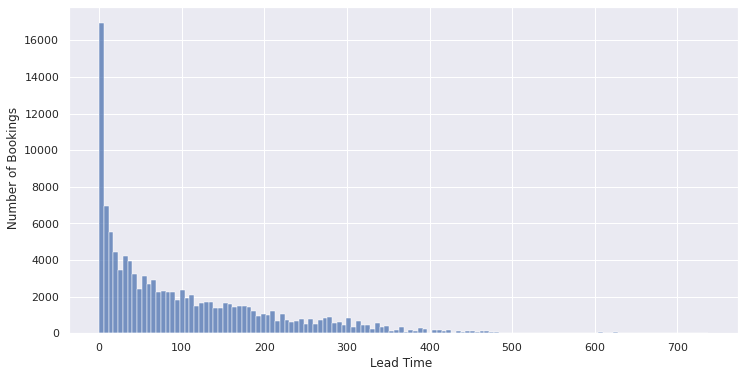

In [44]:
# Lead Time Distribution:
plt.figure(figsize = (12,6))
sns.histplot(data =hotel_df, x= 'lead_time')
plt.xlabel("Lead Time ")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_lead_time.png")
# files.download("Bookings_lead_time.png");

## Why This Chart?
Histogram plot displays a single continuous feature and help visualize properties such as deviation and average values. It makes bins from the continuous values and display the bars based on the frequency of the bin. 

## Insights: 
Lead Time is poitively skewed i.e. the main chunk of bookings are concentrated towards less lead time. Lead time is the number of days that elapsed between the entering date of the booking into the PMS and the arrival date. Also, the modal value is zero. Thus, most of the bookings are instant and pre-bookings are very less. 

## Impact: 
Both the hotels should further analysed into the available resources so that it can handle the most chunk of last minute bookings. Thus, could have positive impact i.e. increase in bookings if a balance is maintained in cost of added resources and the increased bookings.

# Chart -7 : ADR Analysis: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

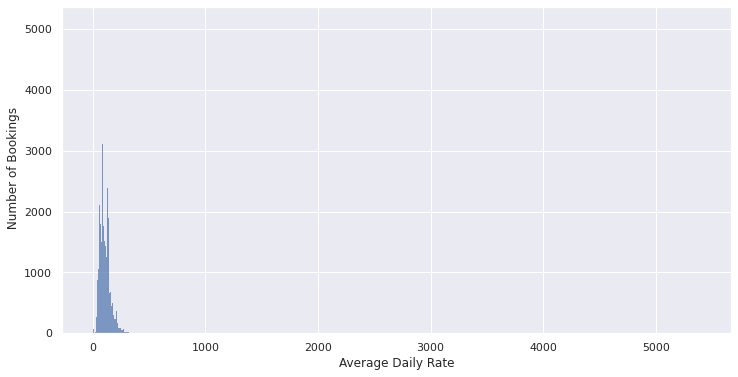

In [45]:
# Average Daily Rate Distribution:
plt.figure(figsize = (12,6))
ax = plt.gca()
sns.histplot(data =hotel_df, x= 'adr',ax = ax)
plt.xlabel("Average Daily Rate")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_adr.png")
# files.download("Bookings_adr.png");
# plt.show()

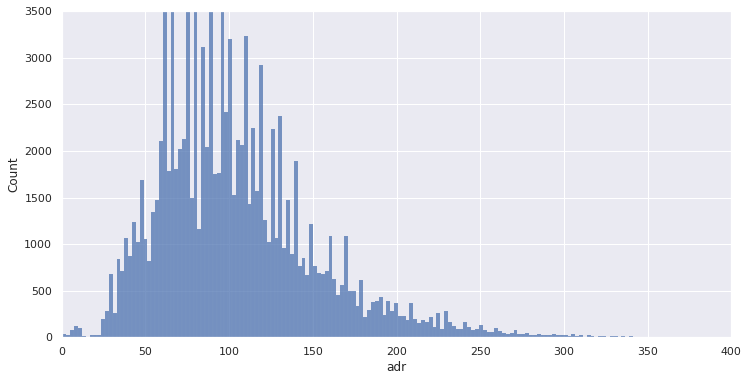

In [46]:
# Zooming adr distribution to see the trends better:
plt.figure(figsize = (12,6))
ax = plt.gca()
sns.histplot(data =hotel_df, x= 'adr',ax = ax)
ax.set_ylim((0,3500))
ax.set_xlim(0,400)
plt.show()

In [47]:
hotel_df.adr.describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [48]:
# Removing the outlier in adr:
hotel_df[hotel_df['adr']>1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,No intermediaries,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [49]:
hotel_df = hotel_df[hotel_df['adr']<1000]

## Why This Chart?
Histogram plot displays a single continuous feature and help visualize properties such as deviation and average values. It makes bins from the continuous values and display the bars based on the frequency of the bin.

## Insights: 
ADR is more concentrated in 0 to 250 window, but there are instances of ADR of 5040 also but that booking was cancelled.Hotel average daily rate (or ADR) is a calculation for how much money hotel brings in per day in room rentals. This is not a comprehensive calcula-tion; ADR only accounts for the amount the hotel is making per day in room bookings. It does not consider earnings from ancillary revenue such as extra amenities and services hotel offers — add-ons such as spa treatments, pool access, room ser-vice, vending machines, etc.

ADR is the basis for understanding the average rate of a stay at your hotel. It’s important to con-sistently and periodically calculate ADR, as it will change with the seasons. ADR is affected by factors such as time of year, location, and local events guests stay to attend.

To calculate ADR, divide the room revenue by the number of rooms sold. Thus, if the room revenue is not increasing but ADR is increasing, then it is a concern for the hotel as it points towards low occupancy. 
## Impact: 
Can't reach to a particular conclusion , trhis needs further analysis. 


# Chart - 8: Days in waiting list: 

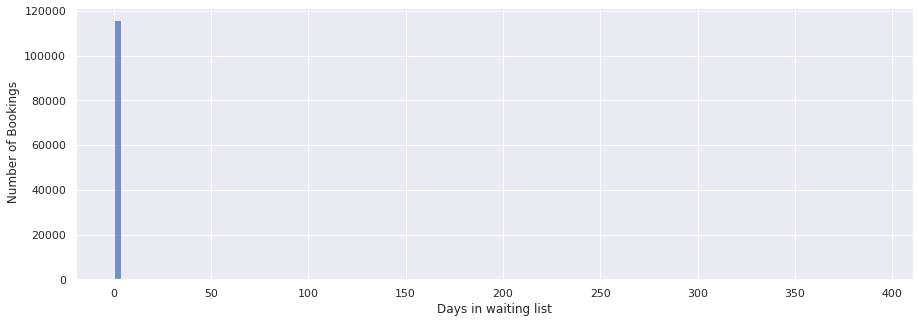

In [50]:
# Analysing Days in waiting list:
plt.figure(figsize =(15,5))
sns.histplot(data = hotel_df, x= 'days_in_waiting_list', bins = 100)
plt.xlabel("Days in waiting list")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_waiting_list.png")
# files.download("Bookings_waiting_list.png")
plt.show();

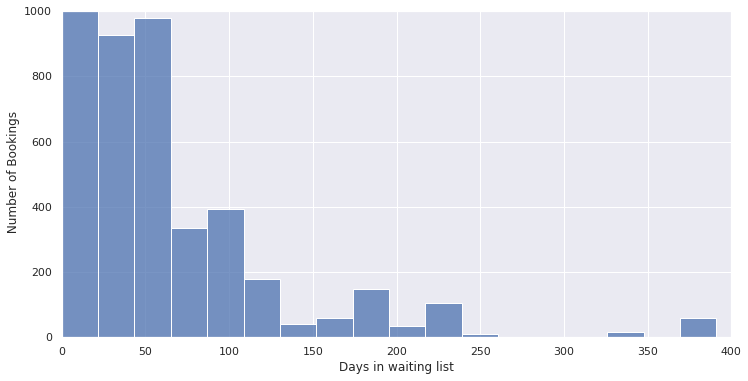

In [51]:
# zooming it: 
plt.figure(figsize = (12,6))
ax = plt.gca()
sns.histplot(data =hotel_df, x= 'days_in_waiting_list',ax = ax)
ax.set_ylim((0,1000))
ax.set_xlim(0,400)
plt.xlabel("Days in waiting list")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_waiting_list.png")
# files.download("Bookings_waiting_list.png")
plt.show()

## Why This Chart?
Histogram plot displays a single continuous feature and help visualize properties such as deviation and average values. It makes bins from the continuous values and display the bars based on the frequency of the bin.

## Insights: 
Most of the bookings have 0 days as waiting time which confirms trhe modal lead time of 0 days. But the range of 400 days is quite worrisome. 

## Impact: 
Having less waiting time i.e. early comfirmation of the bookings certainly positively impact the business. But whether large waiting time negatively affects the bookings needs to be checked. 

# Chart -9 : Rooms in demand: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

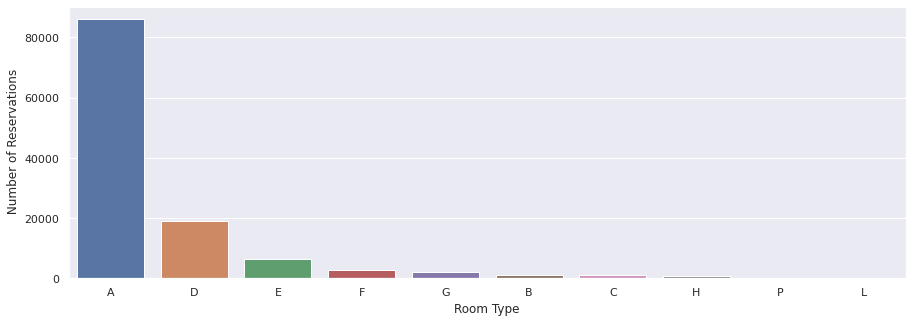

In [52]:
# Rooms in Demand:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel_df, x= 'reserved_room_type',order = hotel_df['reserved_room_type'].value_counts().index)
plt.xlabel("Room Type")
plt.ylabel(" Number of Reservations")
# plt.savefig("Bookings_rr.png")
# files.download("Bookings_rr.png");
plt.show()

## Why this Chart:
Countplot hepls to understand the distribution of data having discrete values. 
## Insights:
Room type A remains the favourite among all. 
## Impact: 
Neutral Impact as such. 

# Chart -10 : Rooms Assigned: 

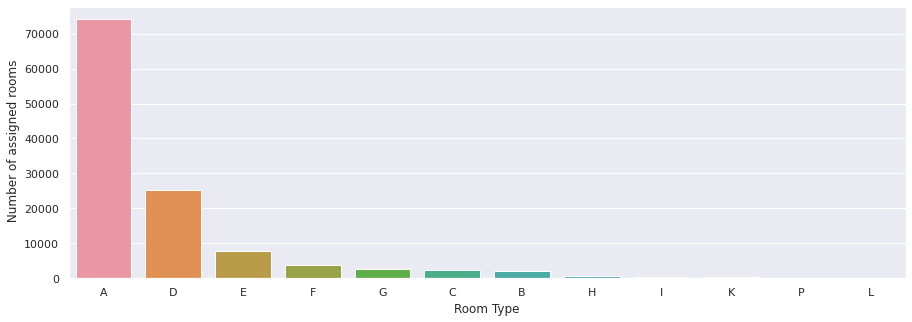

In [53]:
# Reality Check --- we don't always get served what we want...analysing assigned room type:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel_df, x = 'assigned_room_type',order = hotel_df['assigned_room_type'].value_counts().index)
plt.xlabel("Room Type")
plt.ylabel(" Number of assigned rooms")
# plt.savefig("Bookings_ar.png")
# files.download("Bookings_ar.png");
plt.show()

## Why this Chart:
Countplot hepls to understand the distribution of data having discrete values.

## Insights:
Room type A is assigned to most of the people. But when compared to the room reserved, it seems that proportion are not same. Most of the people who have demanded room type A has been allotted other rooms. 

## Impact:
Neutral Impact as such.

# Chart-11: Meals Analysis: 

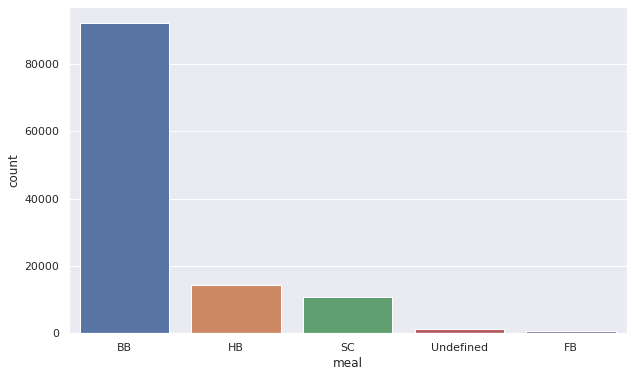

In [54]:
# Meals Analysis:
plt.figure(figsize = (10,6))
sns.countplot(data = hotel_df, x= 'meal', order = hotel_df['meal'].value_counts().index)
plt.show()

## Why this Chart:
Countplot hepls to understand the distribution of data having discrete values.

## Insights:
Bread & Breakfast remains the favourite among all.

## Impact:
Neutral Impact as such.

# Chart -12 : Number of bookings per segment:


Text(0, 0.5, ' Number of Bookings')

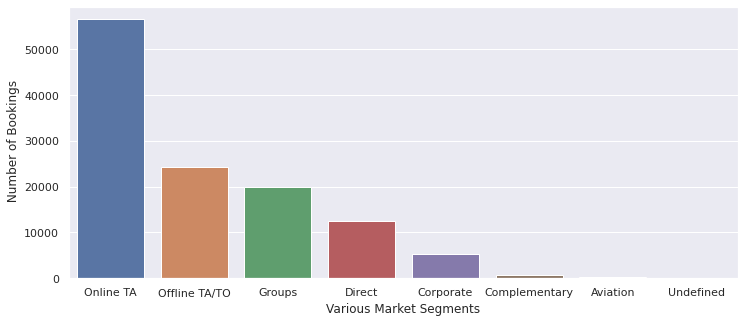

In [55]:
# Number of bookings per market segment:
plt.figure(figsize =(12,5))
sns.countplot(data = hotel_df, x= 'market_segment',order =hotel_df['market_segment'].value_counts().index )
plt.xlabel("Various Market Segments")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_ms.png")
# files.download("Bookings_ms.png");

##  Why this Chart:
Countplot hepls to understand the distribution of data having discrete values.

## Insights:
Most of the bookings are through online TA. 

## Impact:
If used properly can positively impact the business. 

# Chart - 13: Number of Bookings and Distribution Channels: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

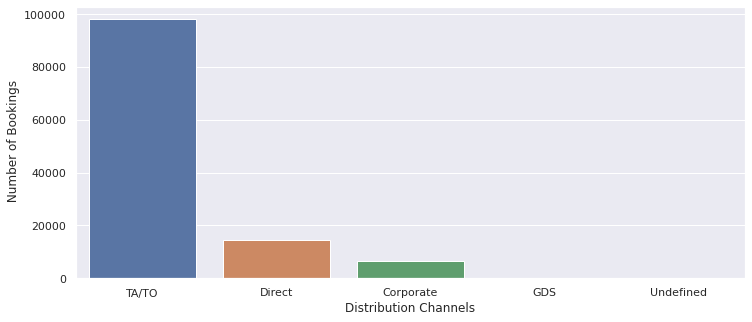

In [56]:
# Distribution channels and their contribution to bookings: 
plt.figure(figsize =(12,5))
sns.countplot(data = hotel_df, x= 'distribution_channel',order =hotel_df['distribution_channel'].value_counts().index )
plt.xlabel("Distribution Channels")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_dc.png")
# files.download("Bookings_dc.png");

## Why this Chart:
Countplot hepls to understand the distribution of data having discrete values.

## Insights:
Tour Operators and Travel Agencies seems to bring most of the bookings. 

## Impact:
If used properly can positively impact the business.



# Bivariate Analysis:

# Analysing the factors related to cancellations:
1. Are number of days in waiting list is linked to cancellation or not?
2. If most of the cancellations were from repeated guests or the new guests?
3. The number of tourists who have previously cancelled the bookings too
4. Tourist Cancellation with respect to deposit type

# Are number of days in waiting list is linked to cancellation or not?

In [57]:
# Days in waiting list--cancellations:
hotel_df.groupby(['is_canceled']).describe()['days_in_waiting_list'].T

is_canceled,0,1
count,75166.000000,44223.000000
mean,1.589868,3.564163
std,14.784875,21.489004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,379.000000,391.000000


##  Observation: 
Average waiting day for bookings cancelled is 3.5 days with deviation of 21 days and for the one not cancelled is 1.5 days and deviation is 14 days. 
75% of bookings fall under 0 waiting time. Maximum waiting days for both are nearly same. Thus, less chances of waiting days affecting the bookings. 

# If most of the cancellations were from repeated guests or the new guests?

In [58]:
# Number of repeated_guests
hotel_df['is_repeated_guest'].value_counts()

0    115579
1      3810
Name: is_repeated_guest, dtype: int64

In [59]:
# Repeated guests's cancellation Status:
hotel_df.groupby(['is_repeated_guest','hotel']).sum()['is_canceled'].unstack().T.rename(columns ={0: 'No',1: 'Yes'})

is_repeated_guest,No,Yes
hotel,,
City Hotel,32660,441
Resort Hotel,11011,111


In [60]:
(441+111)/3810

0.14488188976377953

## Observation:

1. Most of the cancellations are from new customers  
2. Although 14 % i.e. Nearly 550 out of 3810 guests who consider the hotel again, canceled the bookings. Thus, hotel should contact them to know their reasons or feedbacks for more customer retention.

# The number of tourists who have previously cancelled the bookings too

In [61]:
hotel_df['previous_cancellations'].value_counts()

0     112905
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [62]:
# previous Cancellations----> Cancellations:
hotel_df.pivot_table(columns = 'is_canceled',index= 'previous_cancellations',values= 'hotel',aggfunc = 'count').rename(columns ={0: 'No',1: 'Yes'})

is_canceled,No,Yes
previous_cancellations,,
0,74624.0,38281.0
1,337.0,5714.0
2,78.0,38.0
3,45.0,20.0
4,24.0,7.0
5,17.0,2.0
6,15.0,7.0
11,25.0,10.0
13,1.0,11.0


In [63]:
hotel_df[(hotel_df['is_canceled']==1) & (hotel_df['previous_cancellations']>13)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14779,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,No intermediaries,0,Transient,50.0,0,0,Canceled,2015-01-30
14780,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,No intermediaries,0,Transient,50.0,0,0,Canceled,2015-01-30
14781,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,No intermediaries,0,Transient,50.0,0,0,Canceled,2015-01-30
14782,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,No intermediaries,0,Transient,50.0,0,0,Canceled,2015-01-30
14783,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,No intermediaries,0,Transient,50.0,0,0,Canceled,2015-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15170,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,No intermediaries,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15171,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,No intermediaries,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15172,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,No intermediaries,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15173,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,No intermediaries,0,Transient-Party,8.0,0,0,Canceled,2015-06-17


In [64]:
hotel_df[(hotel_df['is_canceled']==1) & (hotel_df['previous_cancellations']>13)]['arrival_date_year'].unique()

array([2015])

In [65]:
hotel_df[(hotel_df['is_canceled']==1) & (hotel_df['previous_cancellations']>13)]['arrival_date_month'].unique()

array(['October', 'September', 'July'], dtype=object)

In [66]:
hotel_df[(hotel_df['is_canceled']==1) & (hotel_df['previous_cancellations']>13)]['arrival_date_year'].duplicated().sum()

132

## Observation:

All tourists with more than 13 cancelations are actually cancelling most, infact all of their bookings and moreover most of the data values are duplicate here. They are either mass bookings who could be the habitual nuisance or there is technical glitch while saving the data. They should either be blocked or other actions must be taken to avoid any effect to the availabilty of rooms and if it is technical glitch, it should be sorted as early as possible

# Chart - 14: Tourist Cancellation with respect to deposit type

Text(0, 0.5, ' Number of Bookings')

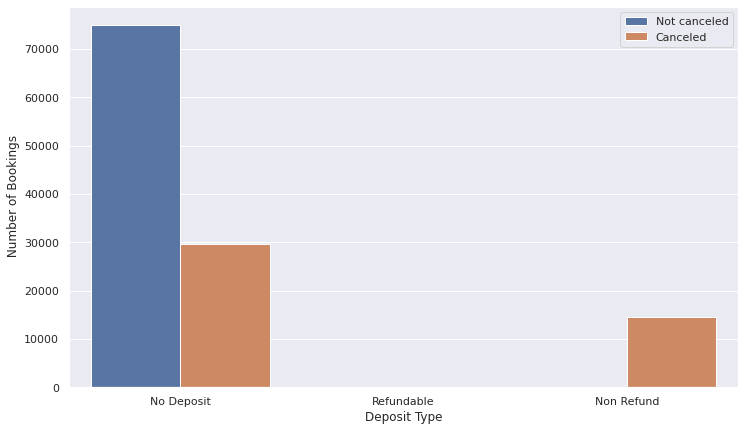

In [67]:
# Proportion of tourist cancellations with respect to deposit type:
plt.figure(figsize = (12,7))
sns.countplot(data = hotel_df,hue = 'is_canceled',x = 'deposit_type')
plt.legend(loc = 'upper right',labels = ['Not canceled','Canceled'])
plt.xlabel("Deposit Type")
plt.ylabel(" Number of Bookings")
# plt.savefig("Bookings_dt.png")
# files.download("Bookings_dt.png");


In [68]:
# Deposit Type----> Cancellations:
hotel_df.pivot_table(index = 'is_canceled',columns= 'deposit_type',values= 'hotel',aggfunc = 'count')[['No Deposit','Refundable','Non Refund']]

deposit_type,No Deposit,Refundable,Non Refund
is_canceled,,,
0,74947,126,93
1,29694,36,14493


## Observation:
People with no deposit are cancelling the most in absolute terms. But if compared to the bookings, Non-refund Bookings cancellations are the most. So, these could be a genuine reason for the cancellation. 

# Average Daily Rate
* The average daily rate (ADR) is a useful tool to maximize revenues in the 
hospitality sector.
* The ADR is measured as the total revenues generated by all the occupied rooms in the hotel or lodge divided by the total number of occupied rooms over a given time period.
* The average daily rate includes only the occupied rooms and not the total available stock.



# Average Daily Rate  analysis:

1. Lead time and ADR
2. Do bookings  on weekends vs on week days affect the revenue
3. How adr is varying over the years.
4. Adr with respect to various room types
5. Contribution of various market segments to ADR
6. Contribution of various distribution channels to ADR

# Chart- 15 : How lead Time affects ADR?

Text(0, 0.5, 'Average daily Rate')

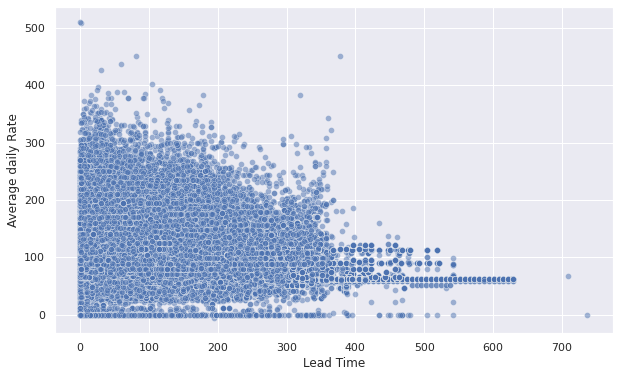

In [69]:
# lead time with average rate:
plt.figure(figsize = (10,6))
sns.scatterplot(data = hotel_df, x= 'lead_time', y= 'adr',alpha = 0.5)
plt.xlabel("Lead Time")
plt.ylabel("Average daily Rate")
# plt.savefig("adr_lead.png")
# files.download("adr_lead.png")

## Why scatter plot?
Scatter plot helps to visualise the distribution of two continuos features and understanding the rekationship between them .

## Insights: 
High lead time leads to low adr and mostly constant. For lower lead times, ADR is unpredictable.

## impact: 
As such the lead time is not positivel or negatively affects the ADR. 

# Chart - 16 : Do bookings on weekdays or weekend affects the ADR?

In [70]:
hotel_df['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

Text(0, 0.5, 'Average daily Rate')

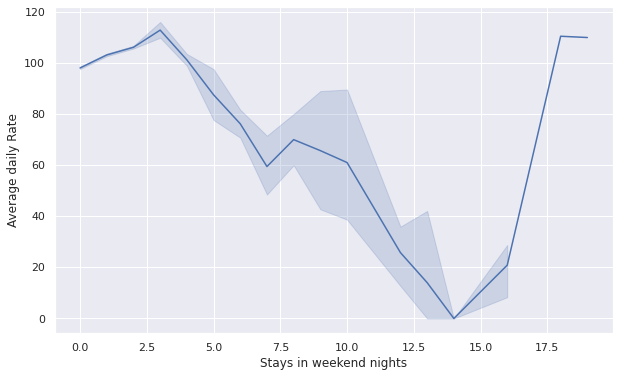

In [71]:
# weekend_nights---> adr
plt.figure(figsize =(10,6))
sns.lineplot(data = hotel_df, x= 'stays_in_weekend_nights', y='adr')
plt.xlabel("Stays in weekend nights")
plt.ylabel("Average daily Rate")
# plt.savefig("adr_weekend.png")
# files.download("adr_weekend.png");

Text(0, 0.5, 'Average daily Rate')

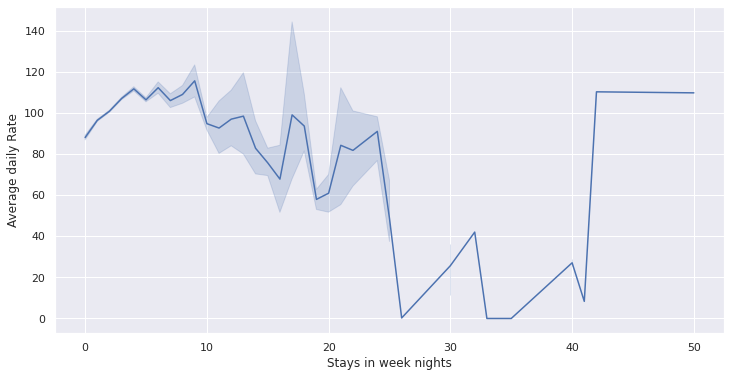

In [72]:
# weekdays ---> adr
plt.figure(figsize =(12,6))
sns.lineplot(data = hotel_df, x= 'stays_in_week_nights', y='adr')
plt.xlabel("Stays in week nights")
plt.ylabel("Average daily Rate")
# plt.savefig("adr_week.png")
# files.download("adr_week.png");

##  Why this chart?
Line chart helps in understanding the relationship between two continuous values specially when there is a time factor. 

## Observation:
ADR keeps on decreasing with the increase in the number of stay days. Also, for 1-2 nights stays be it weekends or week days, ADR is nearly same but for more than that it starts decreasing. If provided with the occupancy Rate , then Revenue could have been calculated very well .


# Chart-17: How ADR is varying over the years:


Text(0, 0.5, 'Average daily Rate')

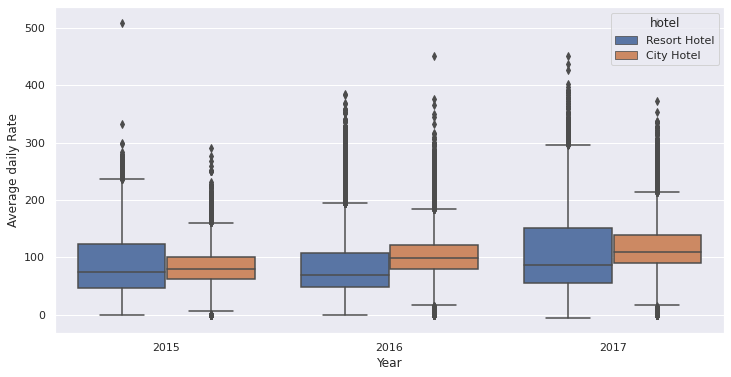

In [73]:
# year --> adr
plt.figure(figsize =(12,6))
sns.boxplot(data = hotel_df, x= 'arrival_date_year', y='adr',hue = 'hotel')
plt.xlabel("Year")
plt.ylabel("Average daily Rate")
# plt.savefig("adr_year.png")
# files.download("adr_year.png");

## Why this chart?
Boxplot - In descriptive statistics, a box plot or boxplot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.
Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score
Here it helps us to find the distribution of ADR over the years. 
## Insights: 
ADR over the year has hardly increased. 
# Impact: 
This simple metric cannot tell us the impact on business alone. 


# Chart - 18: ADR for different market segments: 

Text(0, 0.5, 'Average daily Rate')

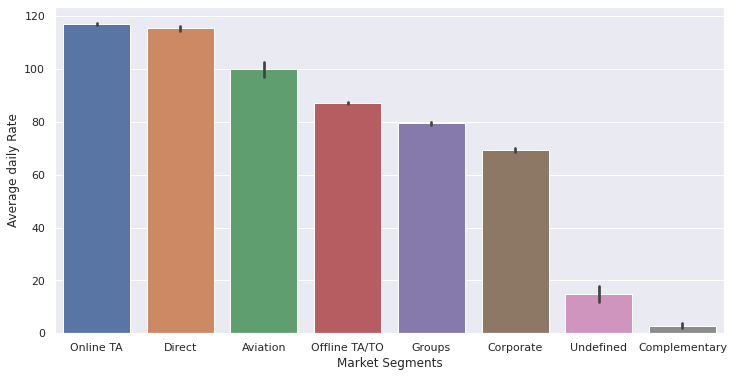

In [74]:
# market segment--ADR
plt.figure(figsize =(12,6))
sns.barplot(data = hotel_df, x= 'market_segment', y='adr',order= hotel_df.groupby(['market_segment']).mean()['adr'].sort_values(ascending = False).index)
plt.xlabel("Market Segments")
plt.ylabel("Average daily Rate")
# plt.savefig("adr_market_segment.png")
# files.download("adr_market_segment.png");

##  Why this chart?
Barplot displays any chosen metric ( mean, standard-deviation) per category. Along with that it also displays confidence interval. we plot the average ADR for various market channels. 

## Insights:
Clearly, online TA are bringing more bookings as well as more revenue, thus the online campaign is doing good. 
Direct bookings were less but the ADR is nearly same. Can increase the number by investing in making online direct presence by the introduction of websites and offers.

## Impact: 
Can positively impact the business if the Online TA and Direct channels are harnessed. 

# Chart - 19: ADR for different distribution Channels:
 

Text(0, 0.5, 'Average daily Rate')

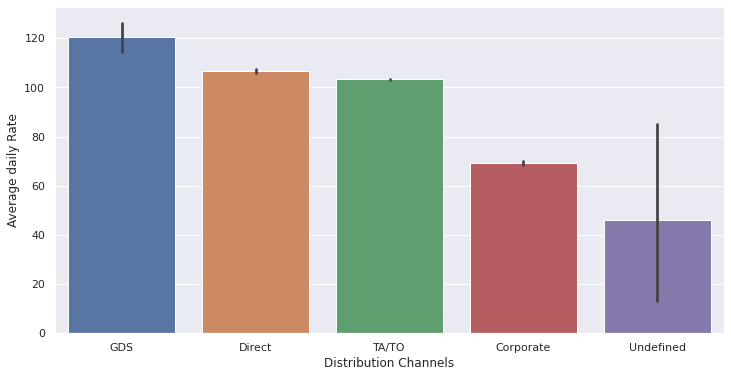

In [75]:
# Distribution Channels-->ADR
plt.figure(figsize =(12,6))
sns.barplot(data = hotel_df, x= 'distribution_channel', y='adr',
            order= hotel_df.groupby(['distribution_channel']).mean()['adr'].sort_values(ascending = False).index)
plt.xlabel("Distribution Channels")
plt.ylabel("Average daily Rate")
# plt.savefig("adr_dc.png")
# files.download("adr_dc.png");

## Why this chart?
Barplot displays any chosen metric ( mean, standard-deviation) per category. Along with that it also displays confidence interval. we plot the average ADR for various market channels.

## Insights & Impact: 
Number of bookings by GDS was very less, but the average ADR is more for them. Thus, if prices are reduced for them, there could be a chance of more customers from them. 
Also, ADR for the corporate is less but the number of bookings is also very less.. Should look upon this and provide them with necessary facilities

# ADR with respect to various room types: 

In [76]:
# How Average daily rates vary with room-type:
hotel_df.groupby('assigned_room_type').describe()['adr']

,count,mean,std,min,25%,50%,75%,max
assigned_room_type,,,,,,,,
A,74052.0,93.070683,36.398632,0.00,67.83,90.000,114.000,450.00
B,2163.0,94.450264,37.791895,0.00,76.25,90.780,111.125,284.10
C,2375.0,113.423583,68.448602,0.00,62.50,93.000,159.330,508.00
D,25322.0,107.453633,49.790700,0.00,68.40,104.725,140.000,375.50
E,7806.0,117.704224,58.540332,0.00,72.00,106.825,157.515,451.50
F,3751.0,151.889931,67.018166,0.00,96.30,160.000,198.900,392.00
G,2553.0,166.530309,79.626103,0.00,105.67,161.860,223.570,510.00
H,712.0,171.380772,82.550465,-6.38,106.00,163.165,225.900,437.00
I,363.0,40.843774,65.354871,0.00,0.00,0.000,62.875,310.20


# Conclusions: 

1. For both hotels, mid-year is really good. They need to be well prepared for the busy period.
2. Portugal, Great Britain and France are the potential countries, should invest in more market campaigning there.
3. Direct Bookings is less and possible reason could be less popularity, should display hoardings on the public places an go for the hotel website as Online TA are doing good, reason could be people preferring online booking more. 
4. People with non-refundable deposit type cancelling the bookings, which is not natural. Hotel should contact them and solve their concerns if any, about the hotel.
5. Should increase the room type A, as availability is less than the demand for it
6. Very few repeated guests are there. Shall contact them for their feedbacks  or ratings.


